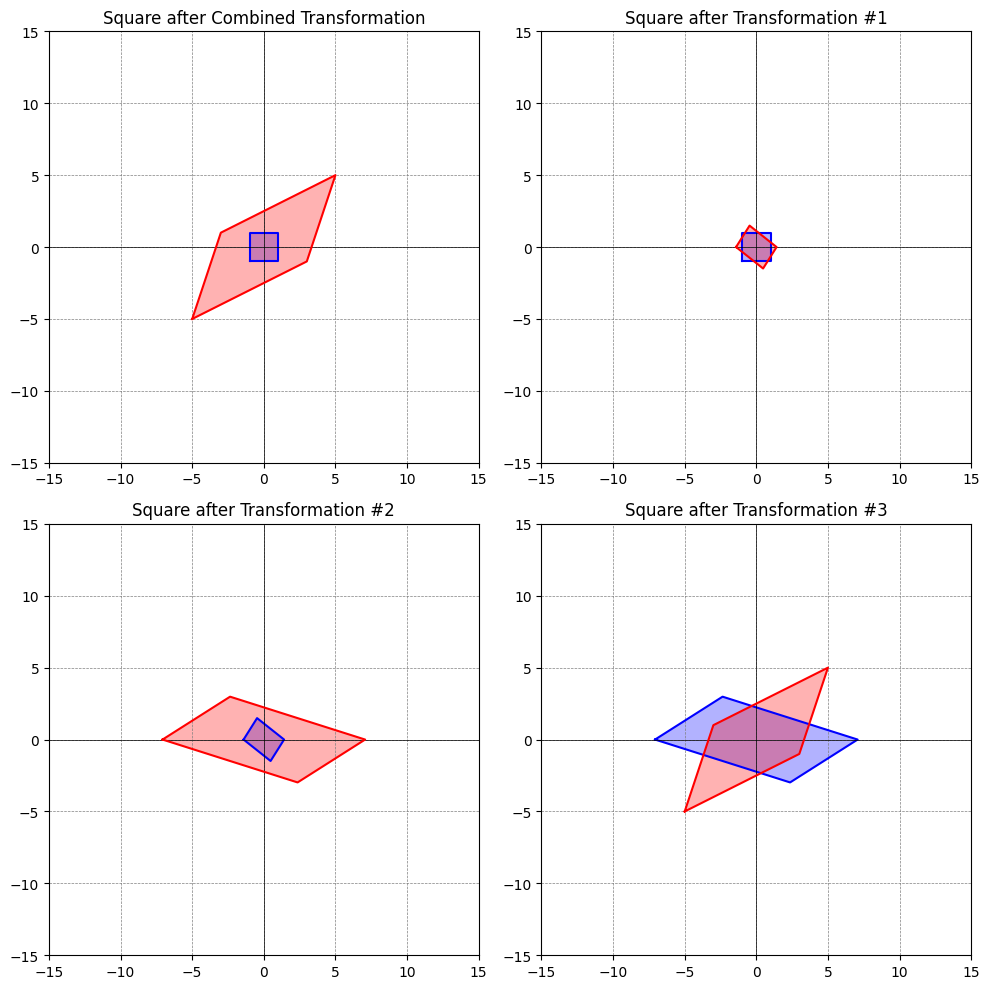

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Plot initial coordinate axis and unit square
def plot_square(ax, square):
    ax.plot(square[0, :], square[1, :], 'b')
    ax.fill(square[0, :], square[1, :], 'blue', alpha=0.3)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Apply transformation and plot
def plot_transformed_square(ax, matrix, square):
    transformed_square = np.dot(matrix, square)
    ax.plot(transformed_square[0, :], transformed_square[1, :], 'r')
    ax.fill(transformed_square[0, :], transformed_square[1, :], 'red', alpha=0.3)
    return transformed_square

# Initialize unit square
square = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1]]).T

# Inputs for 3 2x2 matrices
matrix1 = np.array([[ 0.94280904, 0.47140452], [-0.74535599, 0.74535599]])  # Replace with your matrix
matrix2 = np.array([[5, 0], [0, 2]])  # Replace with your matrix
matrix3 = np.array([[ 0.70710678, -0.4472136 ],[ 0.70710678, 0.89442719]])  # Replace with your matrix
matrices = [matrix1, matrix2, matrix3]

# Calculate product of all three matrices
product_matrix = np.dot(matrix3, np.dot(matrix2, matrix1))

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot combined transformation as the first graph
plot_square(axs[0, 0], square)
square_combined = plot_transformed_square(axs[0, 0], product_matrix, square)
axs[0, 0].set_title('Square after Combined Transformation')

# Plot individual transformations as the remaining graphs
for i, (matrix, ax) in enumerate(zip(matrices, axs.flat[1:]), start=1):
    plot_square(ax, square)
    square = plot_transformed_square(ax, matrix, square)
    ax.set_title(f'Square after Transformation #{i}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Define your square matrix
A = np.array([[4, 1], [2, 3]])

# Perform the eigen decomposition
eigenvalues, V = np.linalg.eig(A)

# Create the diagonal matrix of eigenvalues
Lambda = np.diag(eigenvalues)

# Compute the inverse of V
V_inv = np.linalg.inv(V)

# Verify that A = VΛV^(-1)
A_reconstructed = np.dot(V, np.dot(Lambda, V_inv))

# Print the matrices
print("Matrix V (Eigenvectors of A as columns):")
print(V)
print("\nMatrix Λ (Diagonal matrix of Eigenvalues):")
print(Lambda)
print("\nInverse of V:")
print(V_inv)
print("\nReconstructed A (Should be close to original A):")
print(A_reconstructed)


Matrix V (Eigenvectors of A as columns):
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]

Matrix Λ (Diagonal matrix of Eigenvalues):
[[5. 0.]
 [0. 2.]]

Inverse of V:
[[ 0.94280904  0.47140452]
 [-0.74535599  0.74535599]]

Reconstructed A (Should be close to original A):
[[4. 1.]
 [2. 3.]]


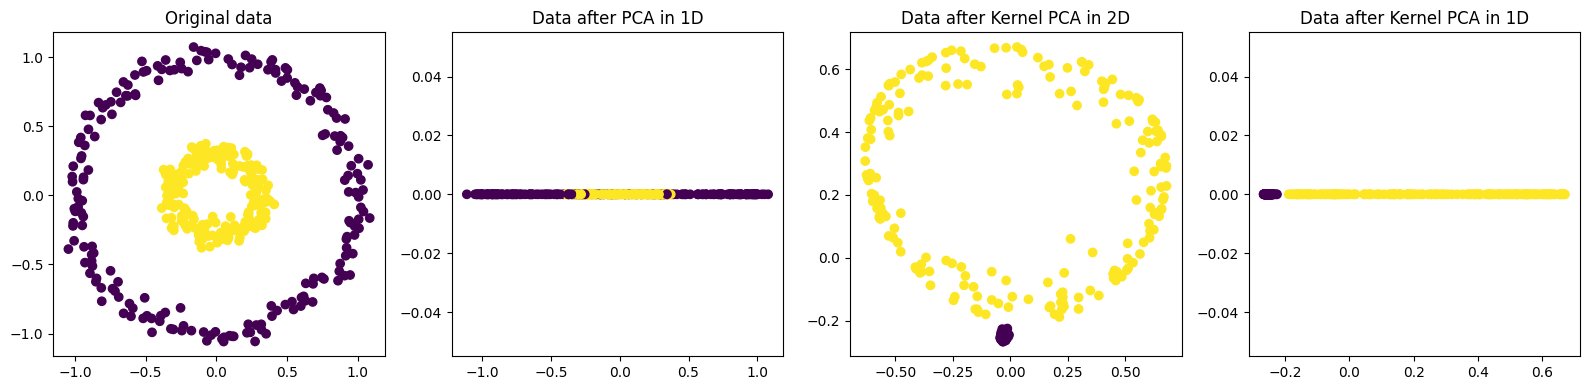

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=10)
X_kpca = kpca.fit_transform(X)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')

# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

plt.tight_layout()
plt.show()


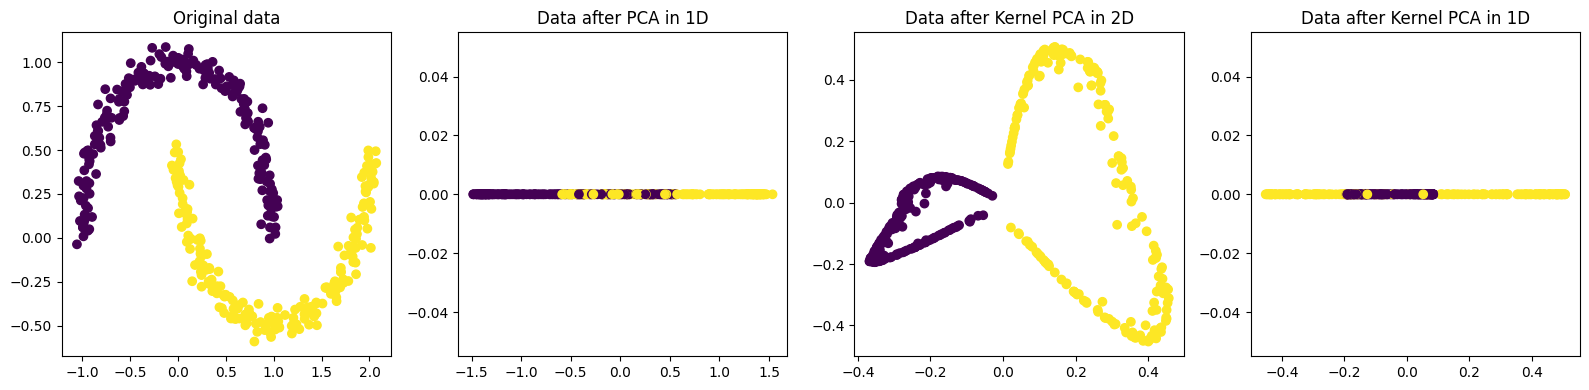

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=400, noise=.05)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')

# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

plt.tight_layout()
plt.show()


In [13]:
import plotly.graph_objs as go
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import numpy as np

# Create the half moon data
X, y = make_moons(n_samples=500, noise=0.02)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply the RBF kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_std)

# Create a trace for the original data
trace1 = go.Scatter(x=X_std[y==0, 0], y=X_std[y==0, 1],
                    mode='markers', name='Class 0',
                    marker=dict(color='red', size=5, opacity=0.5))
trace2 = go.Scatter(x=X_std[y==1, 0], y=X_std[y==1, 1],
                    mode='markers', name='Class 1',
                    marker=dict(color='blue', size=5, opacity=0.5))

# Create a trace for the transformed data
trace3 = go.Scatter3d(x=X_kpca[y==0, 0], y=X_kpca[y==0, 1], z=X_kpca[y==0, 2],
                      mode='markers', name='Class 0',
                      marker=dict(color='red', size=5, opacity=0.5))
trace4 = go.Scatter3d(x=X_kpca[y==1, 0], y=X_kpca[y==1, 1], z=X_kpca[y==1, 2],
                      mode='markers', name='Class 1',
                      marker=dict(color='blue', size=5, opacity=0.5))

# Create the layouts
layout1 = go.Layout(title='Original data in 2D', autosize=True,
                    xaxis=dict(title='Feature 1'),
                    yaxis=dict(title='Feature 2'))
layout2 = go.Layout(title='Data after RBF Kernel PCA in 3D', autosize=True,
                    scene=dict(xaxis=dict(title='PC 1'),
                               yaxis=dict(title='PC 2'),
                               zaxis=dict(title='PC 3')))

# Create the figures and plot
fig1 = go.Figure(data=[trace1, trace2], layout=layout1)
fig2 = go.Figure(data=[trace3, trace4], layout=layout2)

fig1.show()
fig2.show()


## Kernel PCA step by step

Text(0.5, 1.0, 'Original data')

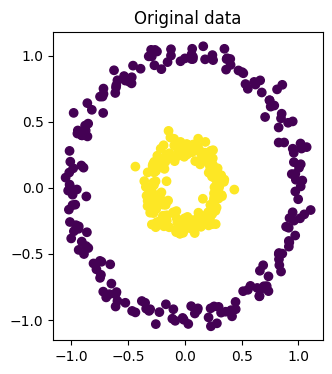

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
import numpy as np

# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

In [ ]:
X_centered = X - np.mean(X, axis=0)

Text(0.5, 1.0, 'Original data')

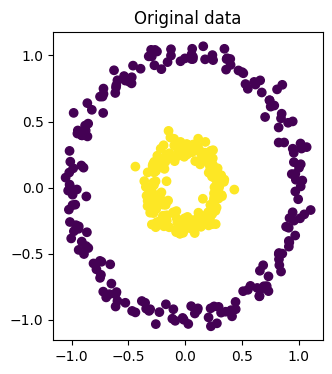

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], c=y)
plt.title('Original data')

In [ ]:
def rbf_kernel(x1, x2, gamma=0.1):
    distance = np.linalg.norm(x1 - x2) ** 2
    return np.exp(-gamma * distance)

# Create the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X_centered[i], X_centered[j])


In [ ]:
K.shape

(400, 400)

In [ ]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(K)

In [ ]:
eigenvectors.shape

(400, 400)

In [ ]:
# Reverse the arrays as eigh returns them in ascending order
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

In [ ]:
eigenvalues.shape

(400,)

In [ ]:
eigenvectors.shape

(400, 400)

In [ ]:
k = 2
X_kpca = eigenvectors[:, :k]

In [ ]:
X_kpca.shape

(400, 2)

Text(0.5, 1.0, 'Data after Kernel PCA in 1D')

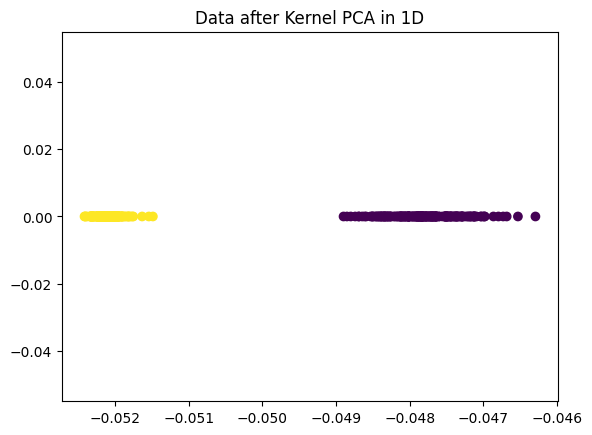

In [ ]:
plt.scatter(X_kpca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

In [ ]:
import numpy as np

# Create a 2D matrix
A = np.array([[1,2], [3,4]])

# Perform SVD
U, S, VT = np.linalg.svd(A)

# U and VT are the left and right singular vectors, while S contains the singular values.
# Note: S is a 1-D array rather than a diagonal matrix. To convert it into a diagonal matrix, you can use np.diag().

print("U:\n", U)
print("S:\n", np.diag(S))
print("VT:\n", VT)


U:
 [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S:
 [[5.4649857  0.        ]
 [0.         0.36596619]]
VT:
 [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]
